### Classification on Auto Immune Dataset
In the given problem our goal is to implement two classification algorithm to predict the Autoimmune_Disease (positive or negative) based on other attributes.
#### Selection of Machine Learning Package
The raw input data that has been provided is tab separated and each individual record including the attribute values and label values are distributed over a single column. So we need to distribute the record set over the rows and separate the independent variables from the dependent variable or label in to two separate dataset. In the subsequent task we have to do classification task to predict Autoimmune_Disease (psitive or negetive) based on other attributes.So we need to load the data from the text file and prepare the data for our classifier. <br>
Now looking at the free open-source machine learning toolkits available online like Python Scikit Learn, WEKA, R Caret I am using Python Scikit Learn package. WEKA is a GUI based tool where we need to feed that data as a text file, so we need to build the required formatted data separately through other tools(like EXCEL) before feeding it to WEKA. Also we need to run different instances for different algorithms in WEKA. R is free and can do the data preparation steps but not all the Machine Learning algorithms come under single library. So to implement different classifiers we need to import different packages. <br>
But in Python all these tasks can be performed in a single notebook(Jupyter Notebook) file and almost all the popular machine learning packages are available under the Scikit Learn package. So I am using Numpy and Pandas for data read and preparation and the Scikit Learn Package to build the classifier.
#### Data Preparation
As per the Scikit Learn Documentation to apply K- Fold Cross Validation along with the classifier we need the individual recordset as a row element. Also we need two separate dataset for the Independent Variables and Dependent Variables or labels. 
Following are the data preparation steps - <br>
1. Load the data from the Text File in a numpy array <br>
2. Transpose the array to get individual record set in separate rows <br>
3. Segregate the record set for dependent variables and independent variable or labels <br>
4. Normalize the dependent variable dataset <sup><a href="http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.normalize.html">1</a></sup>

In [1]:
import numpy as np
from sklearn.preprocessing import normalize
data_original = np.loadtxt("autoimmune.txt",dtype ='str', delimiter="\t")
data_transposed =data_original.transpose()
d_independent = np.delete(data_transposed,4,1)
d_independent_normalize = normalize(d_independent, axis=0, norm='max')
d_labels = data_transposed[:,[4]]

#### Sample Data 

In [2]:
print(d_independent_normalize[0:1])
print(d_labels[0:2])

[[ 0.37037037  0.58181818  0.52309985  0.61616162  0.1         0.18439716
   0.28595041  0.50793651  0.34794521]]
[['positive']
 ['negative']]


In [3]:
import pandas as pd
data_df = pd.DataFrame(data_transposed)
data_df.columns = ["Age","Blood_Pressure","BMI","Plasma_level","Autoimmune_Disease","Adverse_events","Drug_in_serum","Liver_function","Activity_test","Secondary_test"]
data_df['Autoimmune_Disease'] = data_df['Autoimmune_Disease'].replace({'positive': 1, 'negative': 0})
data_df = data_df.astype('float64')
data_df_norm = (data_df - data_df.mean()) / (data_df.max() - data_df.min())
data_df_norm = normalize(data_df, axis=0, norm='max') # Min Max Normalization
#print(data_df_norm[0:5])
data_df[0:5]

,Age,Blood_Pressure,BMI,Plasma_level,Autoimmune_Disease,Adverse_events,Drug_in_serum,Liver_function,Activity_test,Secondary_test
0,30.0,64.0,35.1,61.0,1.0,1.0,156.0,0.692,32.0,12.7
1,22.0,74.0,30.0,40.0,0.0,1.0,60.0,0.527,11.0,0.0
2,21.0,70.0,30.8,50.0,0.0,0.0,50.0,0.597,26.0,22.6
3,23.0,64.0,34.9,59.5,0.0,0.0,92.0,0.725,18.0,1.8
4,25.0,76.0,53.2,81.0,1.0,0.0,100.0,0.759,56.0,3.6


#### Selection of Classification Algorithm
As per the problem statement we have to predict Autoimmune_Disease (which may be positive or negative) based on the attributes. So this is a binary classifier probelm where we have to predict from positive or negetive. As I am using Scikit Learn Toolkit to select the classifier I am following classifier selection diagram provided in the Scikit Learn website <sup><a href="http://scikit-learn.org/stable/tutorial/machine_learning_map/index.html">2</a></sup>.
As per the steps as this is a classification task and the sample count is less than 100K and this is not a text classifier problem so I have selected the following Classifiers.
1. K - Nearest Neighbour
2. Support Vector Machine

<b> K - Nearest Neighbour </b>
The K Nearest Neighbour Algorithm is a classification approach which estimates how likely a test data is to be a member of a group depending on which group is nearest to it. In other words its makes prediction based on the k most similar training patterns in the data set. It is a non-parametric and instance based supervised learning algorithm. It does not assume anything about the form of the hypothesis function except the patterns that are likely. Its also lazy i.e. there is no explicit training phase. When the training data is fed to the system it plots all the data in n-dimentional space on the basis of the features. Now when the algorithm faces a test data it plots the data in the same n-dimntional space formed previously and search for the k-nearest neighbours. It goes through the whole training data each time it needs to predict.

<b> Support Vector Machine </b>
Support Vector Machine is a supervised learning algorithm mostly used for classification tasks. It plot each data point in n-dimentional space where value of each feature is correspond to value of each co-ordinate. Then the classifier tries to find a hyperplane in the n-dimentional space that differentiate the two classes.
When the data is not being segregated by a linear hyper-plane the SVM has a support of Kernal. This function takes low dimensional input space and convert it into higher dimensional spaceand helps in non-linear separation problems.
#### Perform 10-fold cross-validation
Now to implement the 10 fold cross validation I am using the sklearn.model_selection <sup><a href="http://scikit-learn.org/stable/modules/cross_validation.html">3</a></sup> package.
To compare the result set I will check the mean and the standard deviation of the 10 scores derived in both the cases. (KNN and SVM) as mentioned in the Scikit Learn page<br>
<br><b>KNN Implementation</b><br>
Here I am implementing KNN <sup><a href="http://scikit-learn.org/stable/modules/neighbors.html">4</a></sup> with neighbour count 19 as I have found its giving the optimal accuracy

In [4]:
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
clf_KNN = KNeighborsClassifier(n_neighbors=19)
scores_KNN = cross_val_score(clf_KNN, d_independent_normalize, d_labels.ravel(), cv=10)
print(scores_KNN)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_KNN.mean(), scores_KNN.std() * 2))

[ 0.78947368  0.78947368  0.71052632  0.78947368  0.81578947  0.76315789
  0.76315789  0.76315789  0.80555556  0.69444444]
Accuracy: 0.77 (+/- 0.07)


The above result shows the accuracy values for the 10 fold dataset and the mean and standard deviation of these 10 records.
<br><br><b>SVM Implementaion</b><br>
 To implement the SVM we are passing the gamma value as default 1 and the kernal type as rbf <sup><a href="http://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">5</a></sup> as rbf will segregate the data non linearly which will improve the performance. As we have already normalised the data and has a comparatively less amount of data SVM will not use much computational power.

In [5]:
from sklearn import svm
clf_svm2 = svm.SVC(kernel='rbf', C=1, gamma=1)
scores_svm2 = cross_val_score(clf_svm2, d_independent_normalize, d_labels.ravel(), cv=15)
print(scores_svm2)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores_svm2.mean(), scores_svm2.std() * 2))

[ 0.84615385  0.76923077  0.88461538  0.72        0.72        0.76        0.8
  0.88        0.68        0.84        0.88        0.76        0.8
  0.79166667  0.66666667]
Accuracy: 0.79 (+/- 0.14)


#### Comparision of the two results
From the above results we have found SVM has a mean accuracy of 0.79 where as the KNN has 0.77. So it seems SVM behaves little better than the KNN. One reason might be there are few outliers which affected the KNN as KNN is prone to outliers. Also the data provided is not linearly separabale as I have checked the data through scatter plot using Pandas, Matplotlib and Seaborn <sup><a href="https://seaborn.pydata.org/generated/seaborn.lmplot.html">6</a></sup> library.

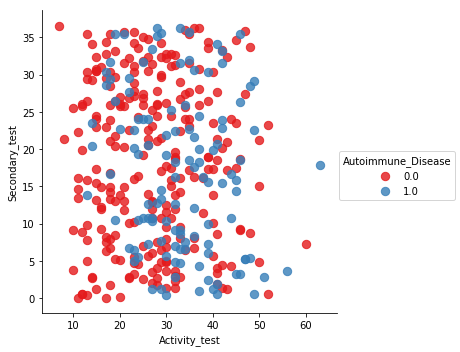

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import normalize
data_df = pd.DataFrame(data_transposed) # convert the raw data to dataframe
data_df.columns = ["Age","Blood_Pressure","BMI","Plasma_level","Autoimmune_Disease", "Adverse_events","Drug_in_serum","Liver_function","Activity_test","Secondary_test"] #provide column name to the data
data_df['Autoimmune_Disease'] = data_df['Autoimmune_Disease'].replace({'positive': 1, 'negative': 0}) # convert Autoimmune_Disease to 0 and 1
data_df = data_df.astype('float64') #Convert all data to float
data_df_norm = normalize(data_df, axis=0, norm='max') #normalise the data
#Plot two dimentions w.r.t Autoimmune_Disease
sns.lmplot('Activity_test', 'Secondary_test', data=data_df, hue='Autoimmune_Disease', palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.show()

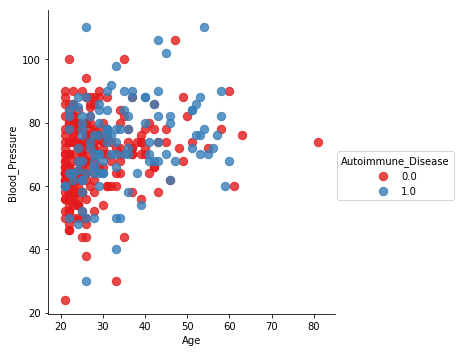

In [7]:
sns.lmplot('Age', 'Blood_Pressure', data=data_df, hue='Autoimmune_Disease', palette='Set1', fit_reg=False, scatter_kws={"s": 70});
plt.show()

#### Compare Performance with ROC Curve
Now we are trying to build the ROC Curve for two different classifier K Nearest Neighbour and Support Vector Machine and compare the performance of them on the given dataset. To construct the ROC curve, we are using the scikit Learn Package from Python.<br><br>
<b>Methodology</b>: <br><br>
<u>Split the data unto Test and Training Set:</u><br><br> 
I have used the ‘train_test_split’ method of python to split the data in test and train in 1:3 ratio. While selecting the data randomly I have used Seed as 42 and stratified the data according to the label, which will ensure both the test and train data has same proportion of positive and negative cases as the overall data set.<br><br>
<u>Build the ROC for KNN and SVM Classifier:</u><br><br>
I have built and trained the model through KNN Classifier with K value of 7. 
Similarly, to build and train the model through SVM I have used the kernel as linear and seed as 42 as we are calculating the probability.
Then I have passed the Test Data to get the probabilities of the predictions. The actual binary label and the corresponding probability of the positive class are then fed through the roc_curve method. This results an array of FPR (false positive rate), TPR (true positive rate) and corresponding threshold. Also, I have calculated the AUC or the Area Under the ROC curve for the two methods.

In [8]:
# Test Train Split
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split

X = data_df.drop('Autoimmune_Disease',axis=1).values
y = data_df['Autoimmune_Disease'].values

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.34,random_state=42, stratify=y)

In [9]:
### ROC Construction for KNN Classifier

clf_KNN1 = KNeighborsClassifier(n_neighbors=7)
clf_KNN1.fit(X_train,y_train.ravel())
y_pred_proba_KNN = clf_KNN1.predict_proba(X_test)[:,1]
#print(clf_KNN.score(X_test,y_test))
fpr_KNN, tpr_KNN, thresholds_KNN = roc_curve(y_test, y_pred_proba_KNN)
ROC_KNN = roc_auc_score(y_test,y_pred_proba_KNN)

### ROC Construction for SVM Classifier
clf_svm3 = svm.SVC( probability=True, kernel='linear',
                                 random_state=42)
clf_svm3.fit(X_train,y_train.ravel())
y_pred_proba_svm = clf_svm3.predict_proba(X_test)[:,1]
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
ROC_SVM = roc_auc_score(y_test,y_pred_proba_svm)

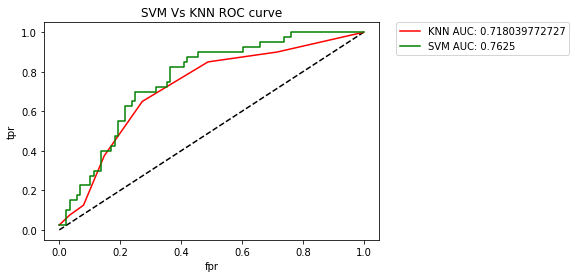

In [10]:
## Plot The ROC Curve
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr_KNN,tpr_KNN,'r', label='KNN' + ' AUC: ' + str(ROC_KNN ))
plt.plot(fpr_svm,tpr_svm,'g', label='SVM' + ' AUC: ' + str(ROC_SVM ))
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('SVM Vs KNN ROC curve')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

In [11]:
## Find the Optimal Threshold For KNN
i = np.arange(len(tpr_KNN)) 
roc_KNN = pd.DataFrame({'tf' : pd.Series(tpr_KNN-(1-fpr_KNN), index=i), 'threshold' : pd.Series(thresholds_KNN, index=i)})
roc_t_KNN = roc_KNN.loc[(roc_KNN.tf-0).abs().argsort()[:1]]
list(roc_t_KNN['threshold'])

[0.42857142857142855]

In [12]:
## Find the Optimal Threshold For SVM
fpr_svm, tpr_svm, thresholds_svm = roc_curve(y_test, y_pred_proba_svm)
i = np.arange(len(tpr_svm)) 
roc_svm = pd.DataFrame({'tf' : pd.Series(tpr_svm-(1-fpr_svm), index=i), 'threshold' : pd.Series(thresholds_svm, index=i)})
roc_t_svm = roc_svm.loc[(roc_svm.tf-0).abs().argsort()[:1]]
list(roc_t_svm['threshold'])

[0.2817015806683118]

### Observations:
1.	As shown in Fig 1 The SVM performs slightly better than the KNN classifier. The AUC for SVM stands at 0.76 where as the AUC for KNN is 0.72. Also, for the lower value of threshold (as the threshold is sorted from higher to lower) the ROC for SVM is much closer to the ideal point (0,1)

2.	We have also found the ROC for KNN is much smoother than the SVM. This is because for K value of 7 we only have 8 different probabilities (including 0 and 1) so in most of the cases we have observations with exact same test values in positive and negative groups. As a result, we got a very limited number of observations in the result set for KNN. So, we got diagonal lines mostly. On the other hand, SVM classifier generally output continuous probabilities so for all the observations we got different set of test values for positive and negative. As SVM continues to map the data in N Dimensional Hyperplane until a hyperplane can be formed to segregate the positive result from negative, it generates multiple number of observations and most of the cases two consecutive observations has same TPR or FPR, we get a much-stepped output. 

3.	As we follow both the ROC curves we have found that the ROC for SVM is mostly inclined towards the Y axis. On the other hand, the ROC for KNN is initially inclined to Y axis but it got flattened as we decrease the threshold. So, for higher threshold both the classifier behaves quite similar but as the threshold decreases SVM performs way better than the KNN and the TPR for the SVM converges to 1 quite early. I have also tried to find out the optimal cut off to get the best threshold where the true positive rate is high and false positive rate is low. The best threshold for SVM – 0.2817 which is near (0.28, 0.7) in the ROC. The threshold optimum threshold for KNN – 0.4285 which is near (0.27, 0.65) in the ROC. So the accuracy of both the classifier increased till the Cut Off point and then gradually started decreasing.


So as the data is not linearly separable as well as contains few outliers the SVM with the rbf kernal gives good result as compared to KNN.
<br>